In [ ]:
#  Mount Google Drive to the path so I can have access to google drive in google colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
n = 100 # set the number of words as a limit per file
# open the txt file and read it
with open('/content/drive/MyDrive/75texts/Οι κόρες της Αφροδίτης - Μιχάλης Πιτένης.pdf.v2.txt', "r", encoding='utf8') as file:
  single_line = file.read().replace("\n", " ") # read the file content and replace line breaks with spaces
    # print(single_line)

words = single_line.split(" ") # split the text in single words
parts = [words[i:i+n] for i in range(0, len(words), n)]  # divide the word list into parts, each with 'n' words

print("Initial split:", parts[0]) # print the first part for checking

print("All parts:", len(parts)) # print the total number of parts
print("Last part:", len(parts[-1])) # print the number of words in the last part

all_files = []  # create an empty list to save the txt file segments
# loop all parts except the last one
for i in range(len(parts[:-1])):
    file_sin_line = ""   # make an empty string to build the text of the current part
    for j in parts[i]:  # loop each word in the current part
      file_sin_line = file_sin_line + " " + j  # add each word with a space
    all_files.append(file_sin_line.strip())  # add the cleaned string to the list


Initial split: ['Στολίσου', 'γίνε', 'όμορφη', 'της', 'Αφροδίτης', 'κόρη', 'στον', 'ουρανό', 'ένα', 'αγόρι,', 'θέλει', "ν'", 'ανεβεί.', 'Κώστας', 'Βίρβος', "(Απ'", 'το', 'τραγούδι', 'Η', 'ΠΑΛΗΑ', 'ΣΩΚΡΑΤΟΥΣ', 'Μουσική:', 'Απόστολου', 'Καλδάρα)', 'Πάντα', 'ήθελε', 'να', 'γυρίζει', 'πίσω.', 'Ακολουθώντας', 'την', 'ίδια', 'διαδρομή.', "Απ'", 'τα', 'ίδια', 'σοκάκια,', 'μπροστά', "απ'", 'τις', 'ίδιες', 'ασπρισμένες', 'αυλές.', 'Αναζητώντας', 'τα', 'ίδια,', 'γνώριμα,', 'πρόσωπα,', 'τους', 'ίδιους', 'ήχους,', 'τις', 'ίδιες', 'μυρωδιές.', 'Ελάχιστα', 'έβρισκε', "απ'", 'αυτά', 'που', 'αναζητούσε.', 'Τα', 'σοκάκια,', 'ασφαλτοστρωμένοι', 'δρόμοι', 'πια.', 'Πεζοδρόμια,', 'εκεί', 'όπου', 'κάποτε', 'οι', 'μεγάλες', 'πέτρες', 'έκαναν', 'η', 'μια', 'παρέα', 'στην', 'άλλη,', 'προσμένοντας', 'την', 'ώρα', 'που', 'θα', "'ρχονταν", 'οι', 'κυράδες', 'τους,', 'να', 'στρώσουν', 'πάνω', 'τους', 'ένα', 'χαλάκι', 'και', 'να', 'καθίσουν,', 'δίπλα,', 'δίπλα', 'για', 'να']
All parts: 704
Last part: 50


In [ ]:
import os

path = "./aphrodite_text_splits/" # make the path in which the txt files will be saved
os.makedirs(path, exist_ok=True) # create the directory

In [ ]:
path = "./aphrodite_text_splits/"

# loop for each small text part we created previously
for i, f in enumerate(all_files):
  file_name = path+"file_"+ str(i) +".txt" # create a file name
  file = open(file_name, "w") # open the file to write to it
  file.write(f) # write the text into the file
  print(f"Saved:{file_name}")

Saved:./aphrodite_text_splits/file_0.txt
Saved:./aphrodite_text_splits/file_1.txt
Saved:./aphrodite_text_splits/file_2.txt
Saved:./aphrodite_text_splits/file_3.txt
Saved:./aphrodite_text_splits/file_4.txt
Saved:./aphrodite_text_splits/file_5.txt
Saved:./aphrodite_text_splits/file_6.txt
Saved:./aphrodite_text_splits/file_7.txt
Saved:./aphrodite_text_splits/file_8.txt
Saved:./aphrodite_text_splits/file_9.txt
Saved:./aphrodite_text_splits/file_10.txt
Saved:./aphrodite_text_splits/file_11.txt
Saved:./aphrodite_text_splits/file_12.txt
Saved:./aphrodite_text_splits/file_13.txt
Saved:./aphrodite_text_splits/file_14.txt
Saved:./aphrodite_text_splits/file_15.txt
Saved:./aphrodite_text_splits/file_16.txt
Saved:./aphrodite_text_splits/file_17.txt
Saved:./aphrodite_text_splits/file_18.txt
Saved:./aphrodite_text_splits/file_19.txt
Saved:./aphrodite_text_splits/file_20.txt
Saved:./aphrodite_text_splits/file_21.txt
Saved:./aphrodite_text_splits/file_22.txt
Saved:./aphrodite_text_splits/file_23.txt
Sa

In [ ]:
# Calculate h-point from a list of word frequencies
def h_point(frequencies):

  # Sorting frequencies in descending order
  frequencies.sort(reverse=True)

  # Iterating over the list
  for i, f_c in enumerate(frequencies, start=1):

      # if frequency is equal to rank
      if i == f_c:
        hpoint=i # match between rank and frequency
        break

      # if frequency is less than rank
      elif i>f_c:
        fr1 = frequencies[i-2] # previous frequency
        r1 = i-1   # previous rank
        fr2 = f_c   # current frequency
        r2 = i     # current rank
        hpoint = ((fr1 * r2) - (fr2 * r1)) / ((r2 - r1) + (fr1 - fr2))
        break

  return hpoint

# calculating H-Index
def H_index(frequencies):

  # sorting in ascending order
  frequencies.sort()
  print(frequencies)
  # iterating over the list
  for i, freq in enumerate(frequencies):

      # finding current result
      result = len(frequencies) - i

      # if result is less than or equal to cited then return result
      if result <= freq:
          return result

  return 0

# calculate R1
def R1(frequencies, N, h_index, h_point):
  cumsum=0  # sum of frequencies up to h-index

  for i in range(0,h_index):
      cumsum+=frequencies[i]

# apply the R1 formula using total tokens N and h_point
  R1_res = 1 - ((cumsum/N) - (pow(h_point,2) / (2*N)))

  return R1_res


import math

# calculate entropy of word frequency distribution
def Entropy(frequencies, N):
  entr_sum = 0  # initialize entropy sum

  for i in range(len(frequencies)):
      p_i = frequencies[i]/N  # probability of word i
      entr_sum += p_i * math.log2(p_i)

  ent = - entr_sum   # final entropy - negative sum

  return ent

# calculate the Lambda - measures variation in word usage frequency
def Lambda_func(frequencies, N):
  L_sum = 0   # initialize sum

  # Loop for frequency pairs
  for i in range(len(frequencies)-1):
      res = pow((pow(frequencies[i]-frequencies[i+1], 2) + 1),1/2)
      L_sum += res

  # final Lambda value using log scaling
  lam = (L_sum * math.log10(N)) / N
  return lam

# calculate the average token length weighted by frequency
def ATL(dictionary, N):
  len_sum = 0

  for i, (key, value) in enumerate(dictionary.items()):
      len_sum += len(key)*value  # word length * number of times it appears

  atl = len_sum / N  # average token length = total length / total tokens

  return atl

In [ ]:
import re
all_indeces = []  # make a list to store all index values for each text part

rr_data = {} # make an empty dictionary to save (V, N) pairs for each file

# loop each text segment and its index
for no, line in enumerate(all_files):
  file_name = f"file_{no:03d}.txt"  # create filename with format no:03d

  # Create an empty dictionary
  d = dict()

  # Remove the leading spaces and newline character
  line = line.strip()

  # Convert the characters in line to lowercase to avoid case mismatch
  line = line.lower()

  # replace " ' " with [space]
  line = line.replace("\'", " ")

  # replace " - " with [space]
  line = line.replace("-", " ")

  # Split the line into words
  words = line.split(" ")

  # Iterate over each word in line
  for word in words:
    if word == "":
      continue
      # Check for words in () or []
    if word.startswith('[') or word.startswith('('):
      word = word[1:]
    if word.endswith(']') or word.endswith(')'):
      word = word[:-1]

    # Check for words that end with punctuation
    if word.endswith('.') or word.endswith(',') or word.endswith(';') or word.endswith(':'):
      word = word[:-1]

    # Check if the word is already in dictionary
    if word in d:
      # Increment count of word by 1
      d[word] = d[word] + 1
    else:
      # Add the word to dictionary with count 1
      d[word] = 1

  # Sorting dictionary by word frequency in descending order
  sortedDict = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

  num_tokens = 0  # Total number of word tokens
  frequencies = []  # make a list of word frequencies

  # collect token and type stats
  for i, (key, value) in enumerate(sortedDict.items(), start=1):
    num_tokens += value
    num_types = i   # i becomes the total number of unique types
    frequencies.append(value)

  V = num_types  # number of unique words
  N = num_tokens  # Total number of words (tokens)
  TTR = V/N  # Type-Token Ratio

  h_p = h_point(frequencies) # compute h-point

  h_i = H_index(frequencies)  # compute h-index

  r1 = R1(frequencies, N, h_i, h_p) # compute R1

  entr = Entropy(frequencies, N) # compute entropy

  lamb = Lambda_func(frequencies, N) # compute lambda

  atl = ATL(sortedDict, N) # compute average token length

  rr_data[file_name] = (V, N) # save (V, N) for this file to calculate Repeat Rate later in the question 9

  # print all the index values for this file
  print(f"{file_name} → TTR: {TTR:}, H_point: {h_p:}, R1: {r1:}, Entropy: {entr:}, Lambda: {lamb:}, ATL: {atl:}")

  # store the results in a list for this file
  file_index = [no, TTR, h_p, r1, entr, lamb, atl]
  all_indeces.append(file_index) # add this file's results to the main list

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4]
file_000.txt → TTR: 0.79, H_point: 3, R1: 1.015, Entropy: 6.161209564709825, Lambda: 1.5848528137423856, ATL: 5.14
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 5]
file_001.txt → TTR: 0.84, H_point: 3, R1: 1.015, Entropy: 6.252662034987094, Lambda: 1.6931370849898473, ATL: 5.36
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6]
file_002.txt → TTR: 0.82, H_poin

In [ ]:
import shutil

# create a zip file named "aphrodite.zip" from the "aphrodite_text_splits" folder to give it to the professor (requirement)
shutil.make_archive("aphrodite", 'zip', "/content/aphrodite_text_splits")

'/content/aphrodite.zip'

In [ ]:
import pandas as pd
# put the column names for the output CSV and dataframe
labels = ["File_name", "TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]
print(labels) # print the column headers
print(all_indeces[2]) # print the index values of the 3rd file - preview

import csv  # import the CSV module for file writing

csv_filename = "indices_results.csv"

# open the file in write mode
with open(csv_filename, 'w', newline="") as file:
    csvwriter = csv.writer(file) # create a csvwriter object
    csvwriter.writerow(labels) # write the header
    csvwriter.writerows(all_indeces) # write the rest of the data

# create a pandas DataFrame from the list of results
df = pd.DataFrame(all_indeces, columns=labels)  # create the columns based on label names
print(df)

['File_name', 'TTR', 'H_point', 'R1', 'Entropy', 'Lambda', 'ATL']
[2, 0.82, 3, 1.015, 6.1985629396449236, 1.6798140956982914, 4.97]
     File_name       TTR  H_point        R1   Entropy    Lambda       ATL
0            0  0.790000     3.00  1.015000  6.161210  1.584853  5.140000
1            1  0.840000     3.00  1.015000  6.252662  1.693137  5.360000
2            2  0.820000     3.00  1.015000  6.198563  1.679814  4.970000
3            3  0.780000     3.00  1.015000  6.074918  1.589574  4.950000
4            4  0.780000     3.50  1.031250  6.077564  1.581421  4.620000
..         ...       ...      ...       ...       ...       ...       ...
698        698  0.768421     3.00  1.015789  5.994811  1.550508  4.705263
699        699  0.740000     3.50  1.031250  5.976147  1.517858  4.640000
700        700  0.757576     3.00  1.015152  6.045776  1.541653  4.505051
701        701  0.744898     4.00  1.040816  5.925079  1.496607  4.704082
702        702  0.710000     4.25  1.050312  5.749437 

In [ ]:
file_path = "indices_results.csv"

# read the CSV file into a DataFrame
texts_results = pd.read_csv(file_path, sep=',', decimal=",") # 'sep' : the column separator  | 'decimal': character used for decimal numbers

# print the shape of the Dataframe (rows, columns)
print("shape:\t", texts_results.shape)
texts_results.head() # show olny the first 5 rows of the df    # I made this format of Dataframe for clear preview - visibility for me, like your quantitative_indexes_lab.ipynb

shape:	 (703, 7)


,File_name,TTR,H_point,R1,Entropy,Lambda,ATL
0,0,0.79,3,1.015,6.161209564709825,1.5848528137423856,5.14
1,1,0.84,3,1.015,6.252662034987094,1.6931370849898473,5.36
2,2,0.82,3,1.015,6.1985629396449236,1.6798140956982914,4.97
3,3,0.78,3,1.015,6.074917659878919,1.5895741732923812,4.95
4,4,0.78,3.5,1.03125,6.077564284943822,1.5814213562373092,4.62



-Δείκτης: TTR
min	 0.6
max	 0.8787878787878788
median	 0.7448979591836735
q25	 0.7171717171717171
q75	 0.7755102040816326
iqr	 0.0583384869099155
‘minimum’	 0.6296639868068439
‘maximum’	 0.8630179344465059


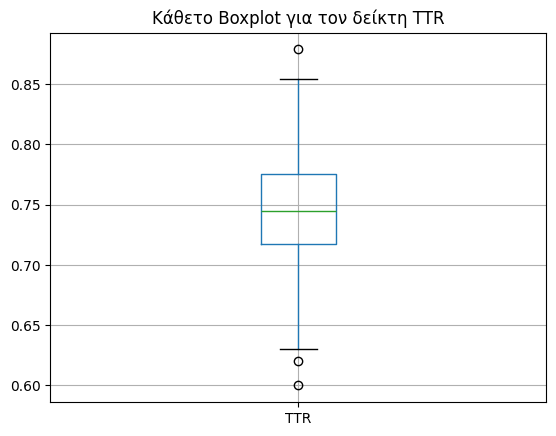

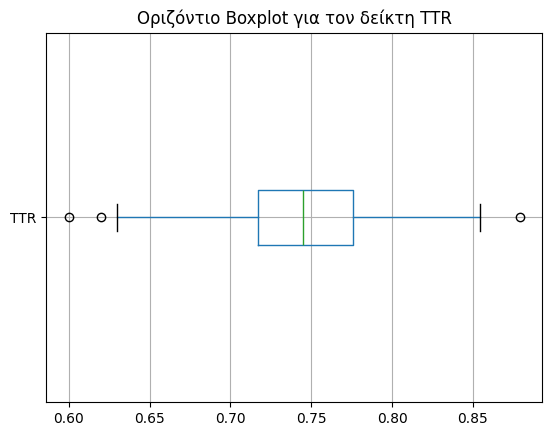


-Δείκτης: H_point
min	 2.5
max	 5.0
median	 3.5
q25	 3.0
q75	 4.0
iqr	 1.0
‘minimum’	 1.5
‘maximum’	 5.5


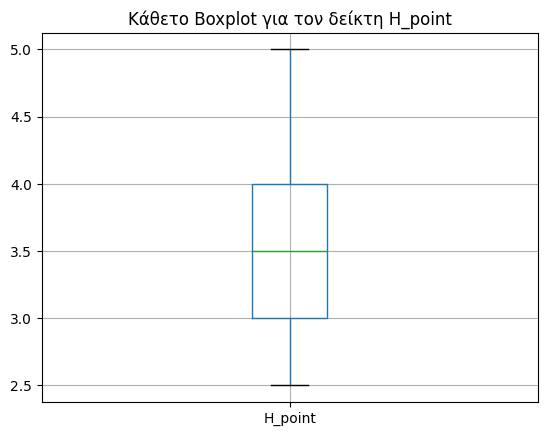

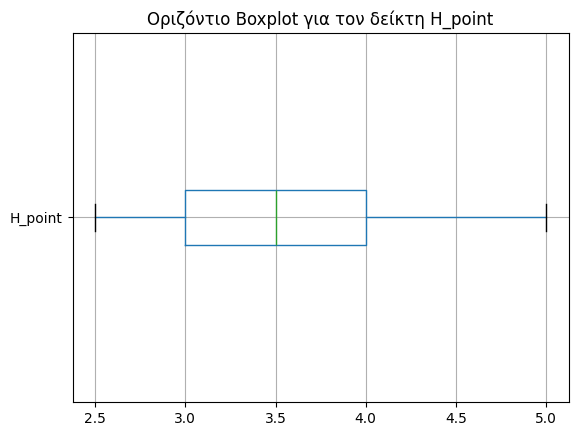


-Δείκτης: R1
min	 1.01171875
max	 1.075
median	 1.0315656565656566
q25	 1.0153850199873764
q75	 1.04
iqr	 0.024614980012623633
‘minimum’	 0.978462549968441
‘maximum’	 1.0769224700189355


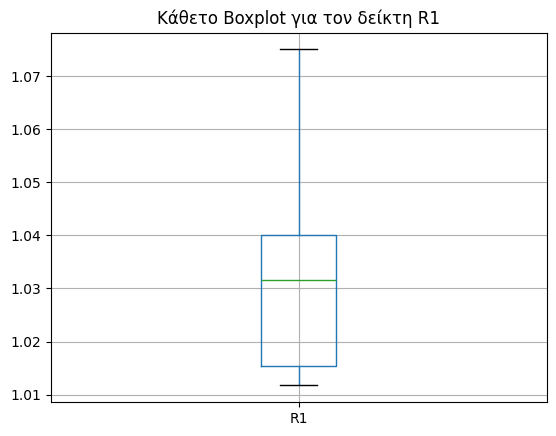

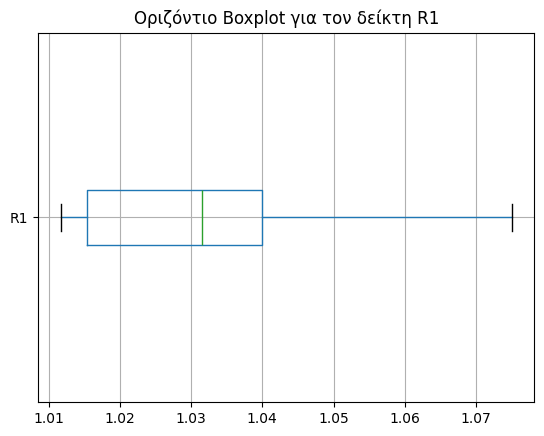


-Δείκτης: Entropy
min	 5.4898552856121485
max	 6.338903210966852
median	 5.9758991822594965
q25	 5.885242317710269
q75	 6.062672421005498
iqr	 0.17743010329522946
‘minimum’	 5.619097162767424
‘maximum’	 6.328817575948342


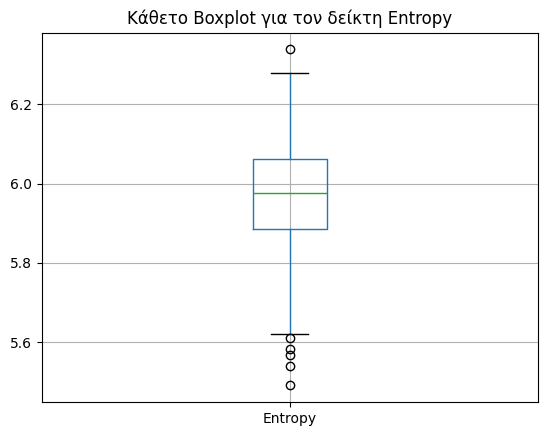

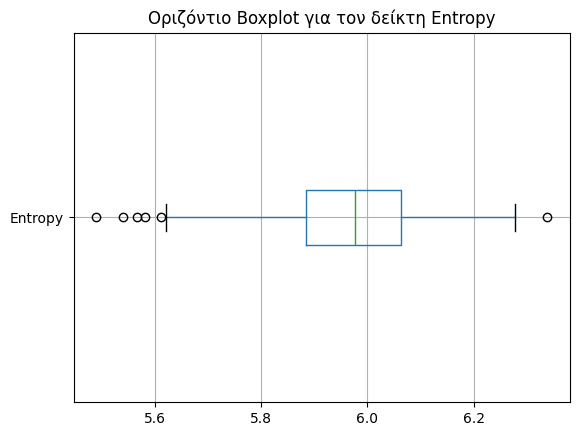


-Δείκτης: Lambda
min	 1.2913439201491206
max	 1.7586311537862969
median	 1.517858444539843
q25	 1.464573664336424
q75	 1.5719423859277035
iqr	 0.10736872159127953
‘minimum’	 1.3035205819495048
‘maximum’	 1.732995468314623


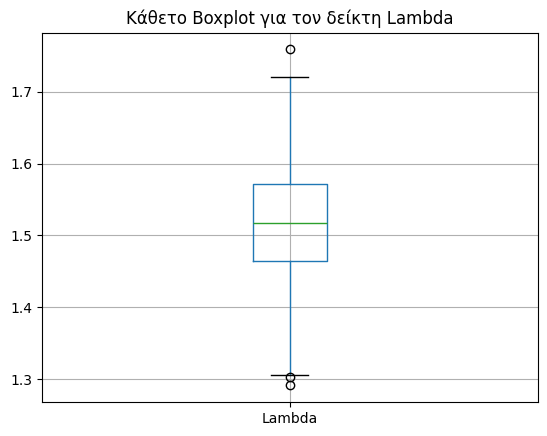

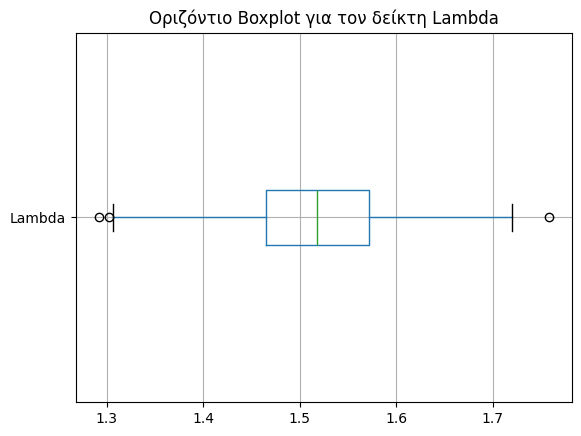


-Δείκτης: ATL
min	 3.711340206185567
max	 5.57
median	 4.717171717171717
q25	 4.535718004790169
q75	 4.91
iqr	 0.37428199520983085
‘minimum’	 3.974295011975423
‘maximum’	 5.471422992814746


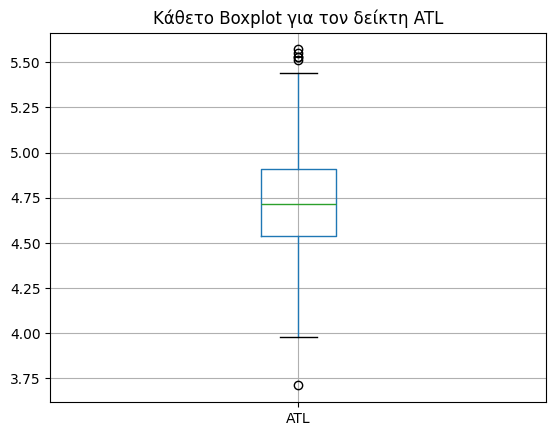

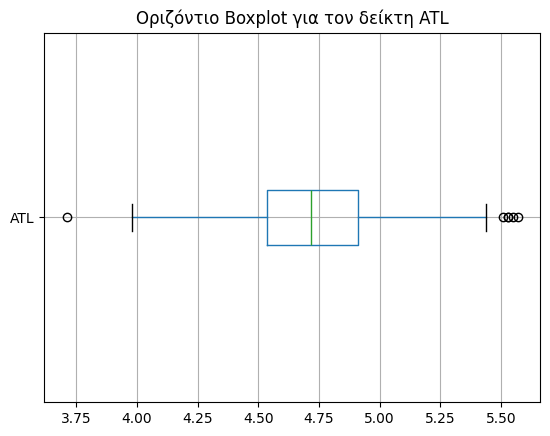

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make a list of text indices I want to analyze
indicators = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# loop for each index to create boxplots and show basic stats
for col in indicators:
  print(f"\n-Δείκτης: {col}")

  # print basic stats: min, max, median
  print("min\t", df[col].min())
  print("max\t", df[col].max())
  print("median\t", df[col].median())

  # calculate the 25th and 75th percentiles
  q75, q25 = np.percentile(df[col], [75 ,25])
  iqr = q75 - q25  # interquartile range

  # print quartiles and IQR
  print("q25\t", q25)
  print("q75\t", q75)
  print("iqr\t", iqr)

  # print bounds for detecting outliers
  print("‘minimum’\t", q25 - 1.5 * iqr)
  print("‘maximum’\t", q75 + 1.5 * iqr)

  # create a vertical boxplot for the current index
  df.boxplot(column=[col])
  plt.title(f"Κάθετο Boxplot για τον δείκτη {col}")
  plt.show()

  # create a horizontal boxplot for the same index
  df.boxplot(column=[col], vert=False)
  plt.title(f"Οριζόντιο Boxplot για τον δείκτη {col}")
  plt.show()

Επικρατούσα τιμή (mode) για τον δείκτη h-point: [3.]
H_point
3.000000    244
4.000000    197
3.500000    186
3.666667     26
4.500000     19
4.333333      9
3.750000      5
3.333333      5
4.250000      3
5.000000      2
3.800000      2
2.666667      2
4.666667      1
2.500000      1
2.750000      1
Name: count, dtype: int64


<Axes: xlabel='H_point'>

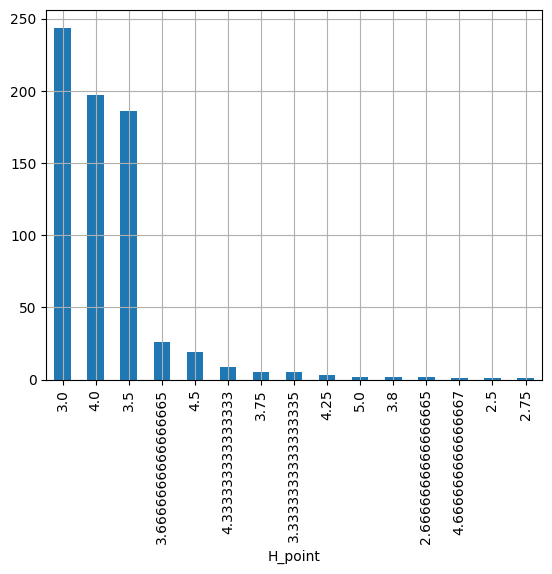

In [ ]:
# calculate the mode of the H_point
mode_hpoint = df["H_point"].mode()
print("Επικρατούσα τιμή (mode) για τον δείκτη h-point:", mode_hpoint.values)

# print how many times each unique H_point value appears
print(df["H_point"].value_counts())

# create a bar chart to visualize the frequency of each H_point value (optional - for my preview)
df["H_point"].value_counts().plot(kind='bar', grid=True)

In [ ]:
# load the CSV file which contains all index results
df = pd.read_csv("indices_results.csv")

# make a list of columns to find and analyze outliers
columns = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# loop each column to check for outliers
for col in columns:
  print(f"\n-Outliers για τον δείκτη: {col}")

  # calculate Q1, Q3, and IQR
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  # define lower and upper bounds for detecting outliers
  minimum = q1 - 1.5 * iqr
  maximum = q3 + 1.5 * iqr

  print(f"Q1: {q1:}, Q3: {q3:}, IQR: {iqr:}")
  print(f"Κατώτερο όριο: {minimum:}")
  print(f"Ανώτερο όριο: {maximum:}")

  # filter the DataFrame to find outliers (outside the bounds)
  outliers = df[(df[col] < minimum) | (df[col] > maximum)]

  # results based on detected outliers
  if len(outliers)==0:
    print("Δεν βρέθηκαν outliers για αυτόν τον δείκτη.")
  else:
    print(f"Βρέθηκαν {len(outliers)} outliers:")
    print(outliers[['File_name', col]])


-Outliers για τον δείκτη: TTR
Q1: 0.7171717171717171, Q3: 0.7755102040816326, IQR: 0.0583384869099155
Κατώτερο όριο: 0.6296639868068439
Ανώτερο όριο: 0.8630179344465059
Βρέθηκαν 3 outliers:
     File_name       TTR
485        485  0.878788
502        502  0.620000
554        554  0.600000

-Outliers για τον δείκτη: H_point
Q1: 3.0, Q3: 4.0, IQR: 1.0
Κατώτερο όριο: 1.5
Ανώτερο όριο: 5.5
Δεν βρέθηκαν outliers για αυτόν τον δείκτη.

-Outliers για τον δείκτη: R1
Q1: 1.0153850199873764, Q3: 1.04, IQR: 0.024614980012623633
Κατώτερο όριο: 0.978462549968441
Ανώτερο όριο: 1.0769224700189355
Δεν βρέθηκαν outliers για αυτόν τον δείκτη.

-Outliers για τον δείκτη: Entropy
Q1: 5.885242317710269, Q3: 6.062672421005498, IQR: 0.17743010329522946
Κατώτερο όριο: 5.619097162767424
Ανώτερο όριο: 6.328817575948342
Βρέθηκαν 6 outliers:
     File_name   Entropy
135        135  5.582048
230        230  5.610721
431        431  5.539418
485        485  6.338903
502        502  5.567209
554        554  5.489855

In [ ]:
# load the CSV file with the calculated indices
df = pd.read_csv("indices_results.csv")

indicators = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# make a list to save the final statistical results
results = []

# loop for each indicator
for col in indicators:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  # filter the data to exclude outliers
  no_outliers = df[(df[col] >= lower) & (df[col] <= upper)]

  # calculate statistics on the cleaned data
  mean_value = no_outliers[col].mean()
  median_value = no_outliers[col].median()
  stand_dev_value = no_outliers[col].std()

  # save the results in a dictionary
  results.append({
      "Δείκτης": col,
      "Μέση τιμή": float(mean_value),
      "Διάμεση τιμή": median_value,
      "Τυπική απόκλιση": stand_dev_value
      })

print(results)

for result in results:
  print(
      f"\nΔείκτης: {result['Δείκτης']}\n"
      f"Μέση τιμή: {result['Μέση τιμή']}\n"
      f"Διάμεση τιμή: {result['Διάμεση τιμή']}\n"
      f"Τυπική απόκλιση: {result['Τυπική απόκλιση']}\n"
      )

[{'Δείκτης': 'TTR', 'Μέση τιμή': 0.7450067979377336, 'Διάμεση τιμή': 0.7448979591836735, 'Τυπική απόκλιση': 0.04154433230679358}, {'Δείκτης': 'H_point', 'Μέση τιμή': 3.516145092460882, 'Διάμεση τιμή': 3.5, 'Τυπική απόκλιση': 0.45786940671591303}, {'Δείκτης': 'R1', 'Μέση τιμή': 1.0300089070870235, 'Διάμεση τιμή': 1.0315656565656566, 'Τυπική απόκλιση': 0.012501878322314678}, {'Δείκτης': 'Entropy', 'Μέση τιμή': 5.9718118976762895, 'Διάμεση τιμή': 5.976307314753091, 'Τυπική απόκλιση': 0.12846976488815492}, {'Δείκτης': 'Lambda', 'Μέση τιμή': 1.518639011880076, 'Διάμεση τιμή': 1.517858444539843, 'Τυπική απόκλιση': 0.07619557579287613}, {'Δείκτης': 'ATL', 'Μέση τιμή': 4.721259768219488, 'Διάμεση τιμή': 4.71, 'Τυπική απόκλιση': 0.2815065107220654}]

Δείκτης: TTR
Μέση τιμή: 0.7450067979377336
Διάμεση τιμή: 0.7448979591836735
Τυπική απόκλιση: 0.04154433230679358


Δείκτης: H_point
Μέση τιμή: 3.516145092460882
Διάμεση τιμή: 3.5
Τυπική απόκλιση: 0.45786940671591303


Δείκτης: R1
Μέση τιμή: 1.03000

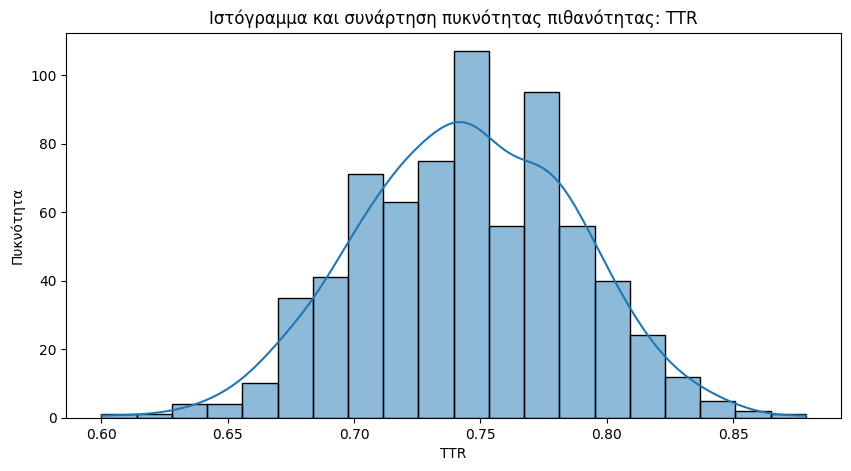

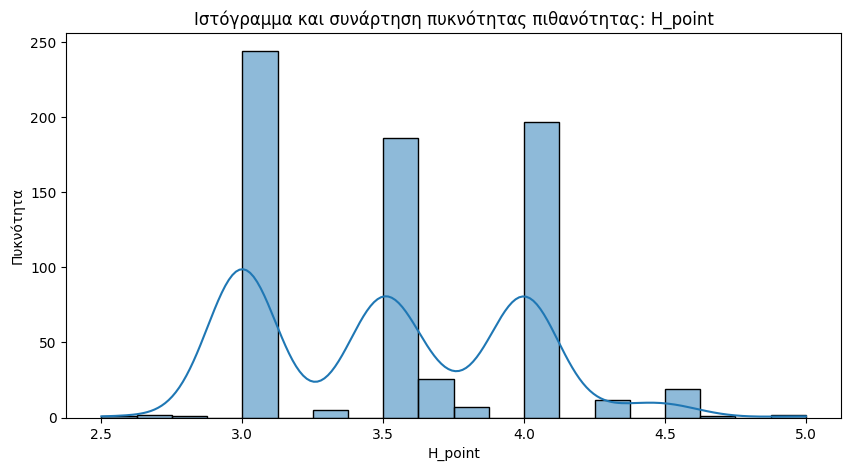

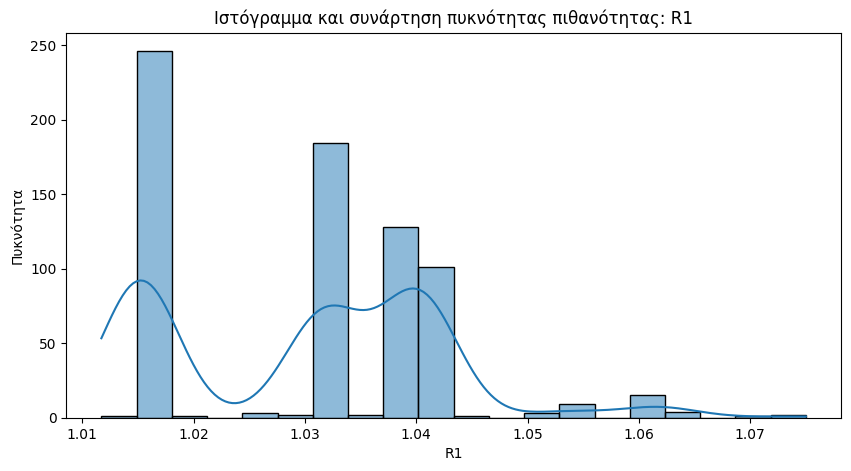

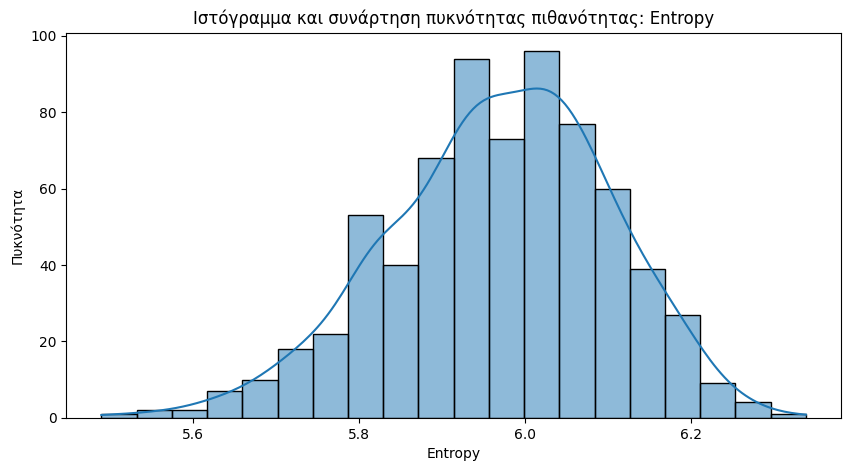

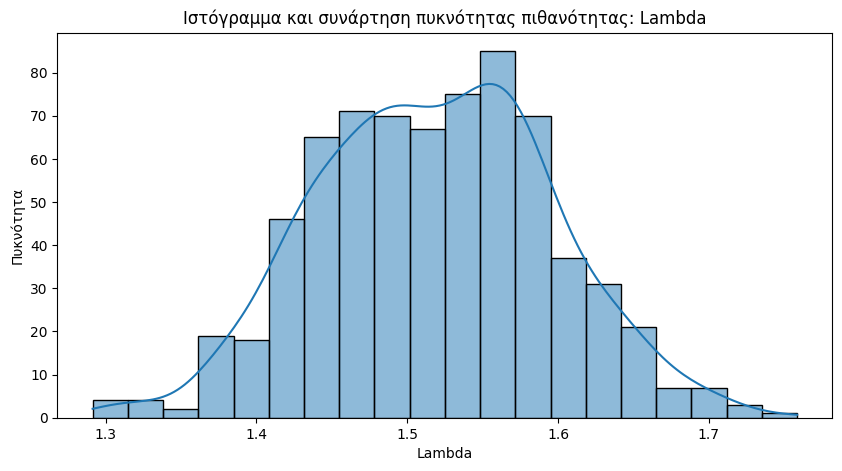

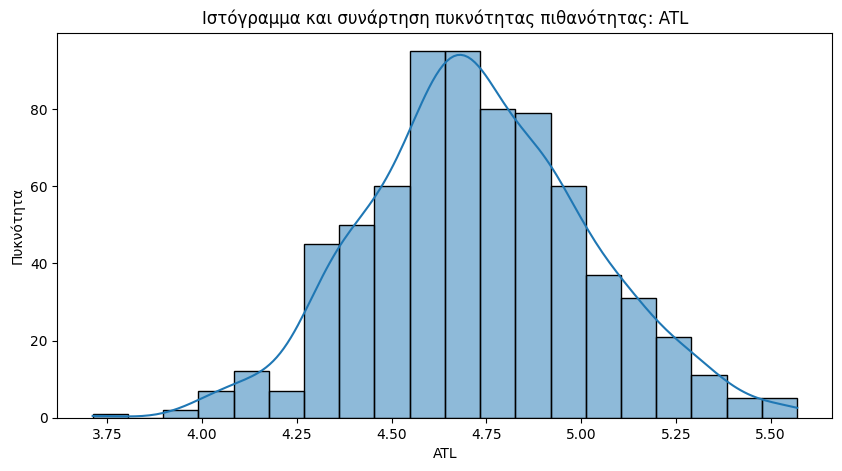

In [ ]:
# In this method I used sns.histplot with kde=True to plot both the histogram and the KDE together.
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# loop for each index
for col in columns:
  plt.figure(figsize=(10, 5))   # create a new figure with specified size
  sns.histplot(df[col], bins=20, kde=True)   # create a histogram with a KDE (Kernel Density Estimation)
  plt.title(f"Ιστόγραμμα και συνάρτηση πυκνότητας πιθανότητας: {col}")
  plt.xlabel(col)
  plt.ylabel("Πυκνότητα")
  plt.show()

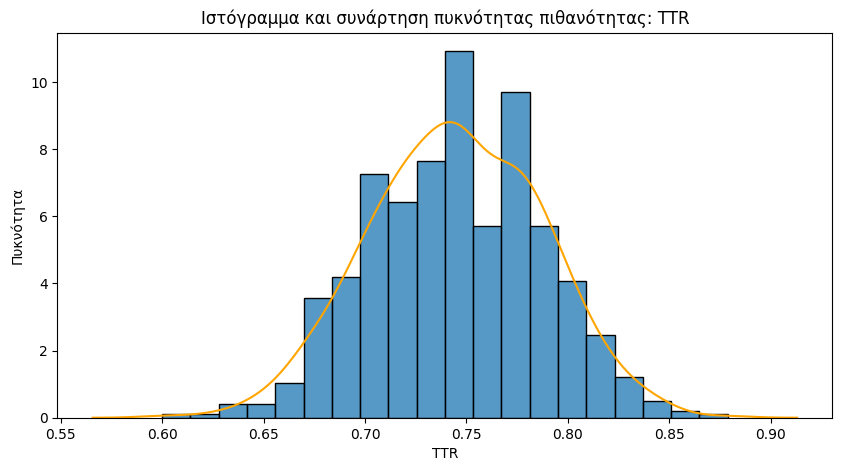

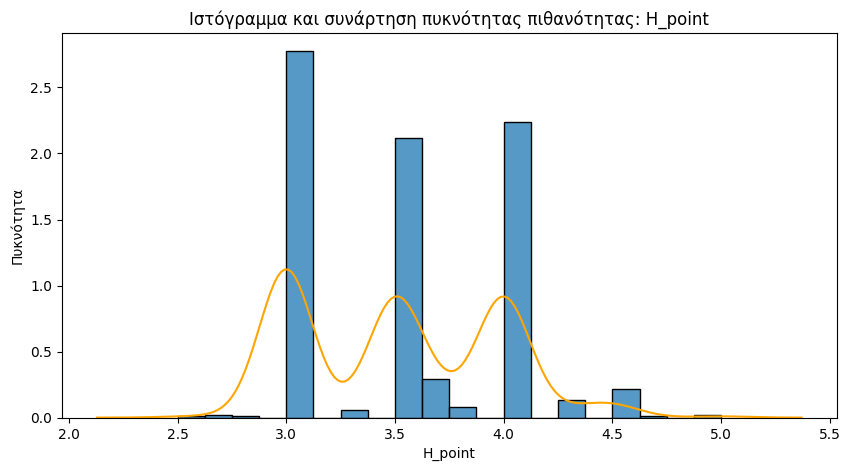

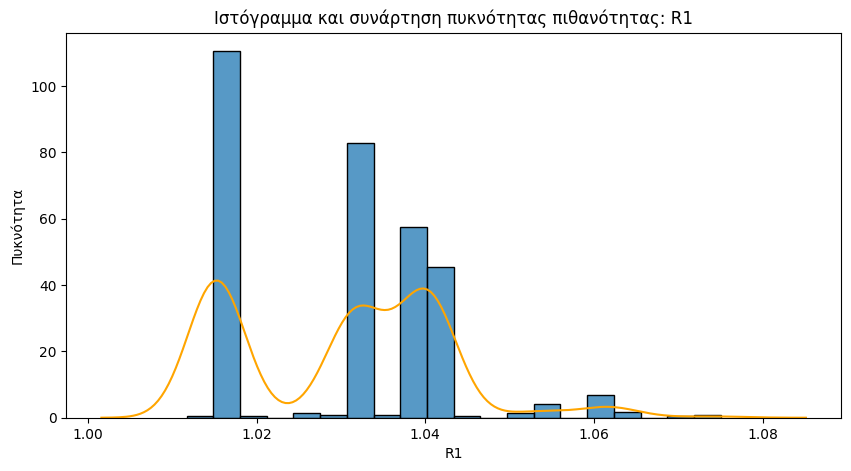

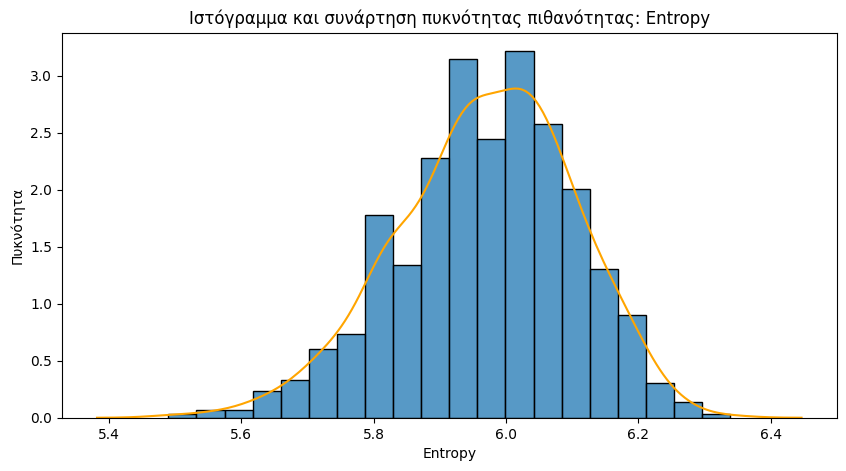

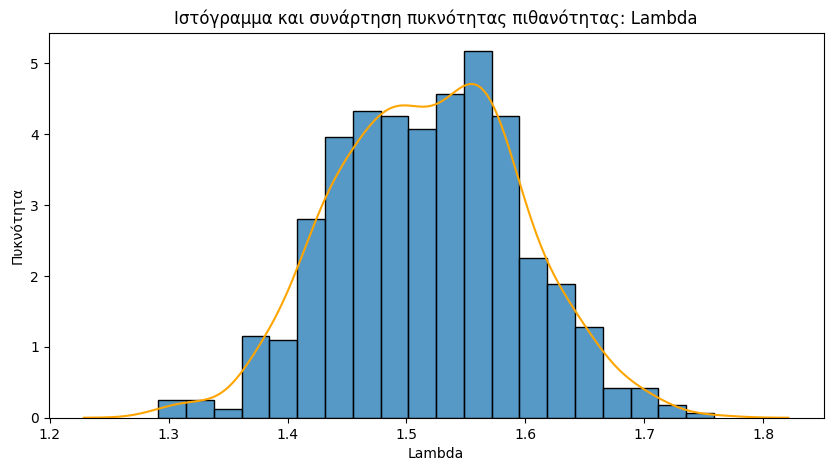

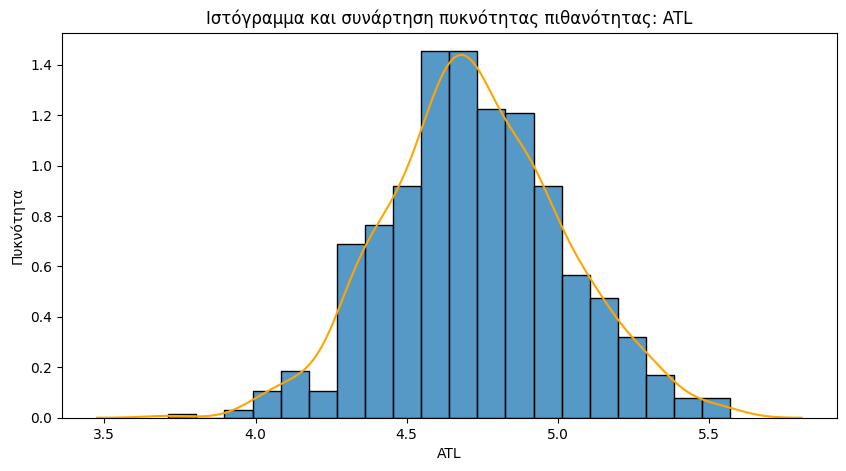

In [ ]:
# (another method - optional) In this method I first plot the histogram and then add the KDE line using sns.kdeplot (I used documentation from https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# Loop for each index
for col in columns:
    plt.figure(figsize=(10, 5))  # Create new figure

    # Histogram that shows density (not count)
    sns.histplot(df[col], bins=20, stat="density")

    # KDE line in orange
    sns.kdeplot(df[col], color="orange")

    # Titles and labels
    plt.title(f"Ιστόγραμμα και συνάρτηση πυκνότητας πιθανότητας: {col}")
    plt.xlabel(col)
    plt.ylabel("Πυκνότητα")
    plt.show()

Based on the calculated **skewness**, most indices show values between -0.5 and 0.5, which, according to the rule of thumb, indicate fairly symmetrical distributions. Especially, TTR, H-point, R1, Entropy, Lambda and Average Token Length have skewness values within this range, which mean that their distributions are approximately symmetric, with no significant skew to the right or left. The positive skewness, that is noticed on H-point, R1 and ATL, implies a slight right-skewed distribution, while the negative one for TTR, Entropy and Lambda implies a slight left-skew. Overall, it is evident that the data are fairly symmetrical, without significant asymmetry.

In terms of **kurtosis** analysis, most indices have kurtosis close to zero and do not significantly exceed the threshold defined by the rule of thumb (|kurtosis| > 4 x √(6/703) ≈ 0.3695). This shows that the distributions are mainly mesokurtic which means that they have tails similar to a normal distribution. Especially, TTR, R1, Entropy, Lambda and ATL have mesokurtic distribution, meaning that there is a standard concentration of values without extreme outliers. However, H-point has a platykurtic distribution, meaning that its distribution has lighter tails relative to a normal distribution with fewer extreme values. Overall, the kurtosis results confirm that the data don't show heavy-tailed or extremely light-tailed distribution.

Regarding the **KDE** plot, for most indices (TTR, Entropy, Lambda and ATL) display a single peak and curve which indicate the **normal distribution.** However, H-point and R1 shows more irregular and multimodal shape which means that there is a deviation from normal distribution. Overall, the indices approximate the normal distrbution with minor deviations for specific cases ( H-point, R1).

In conclusion, the majority of the indices approximate normality, with fairly symmetrical shapes, mesokurtic and smooth KDE curves. Minor deviations (H point and R1) were noticed, but overall the data show consistency with normal distribution.

**You can see the following and above code results/analysis (question 7 and 8) to validate the above conclusion:**

In [ ]:
from scipy.stats import kurtosis, skew    # I followed your code (professor's code) in Descriptive_Stats_lab.ipynb
import seaborn as sns

columns = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"]

# Loop for each column - index
for col in columns:
  print(f" - {col} ")

  # take the data for each column
  part1 = df[col]

  # do basic statistics
  res = part1.describe()
  print(res)

  part2 = part1 / res.get('count') # normalize data

  # compute skewness
  skewness = skew(part2)
  print("\nskewness:", skewness)

  if skewness < 0:
    print("****left-skewed distribution (negatively skewed)****\n")
  if skewness > 0:
    print("****right-skewed distribution (positively skewed)****\n")

 - TTR 
count    703.000000
mean       0.744813
std        0.042382
min        0.600000
25%        0.717172
50%        0.744898
75%        0.775510
max        0.878788
Name: TTR, dtype: float64

skewness: -0.06722333706200845
****left-skewed distribution (negatively skewed)****

 - H_point 
count    703.000000
mean       3.516145
std        0.457869
min        2.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: H_point, dtype: float64

skewness: 0.27408152286432214
****right-skewed distribution (positively skewed)****

 - R1 
count    703.000000
mean       1.030009
std        0.012502
min        1.011719
25%        1.015385
50%        1.031566
75%        1.040000
max        1.075000
Name: R1, dtype: float64

skewness: 0.33204899940626426
****right-skewed distribution (positively skewed)****

 - Entropy 
count    703.000000
mean       5.969390
std        0.133349
min        5.489855
25%        5.885242
50%        5.975899
75%        6.062672
ma

In [ ]:
from scipy.stats import kurtosis, skew

columns = ["TTR", "H_point", "R1", "Entropy", "Lambda", "ATL"] # define the index names

# Loop for finding kurtosis for each column
for col in columns:
  print(f"- {col} ")

  part1 = df[col] # take the data for each column
  res = part1.describe() # compute basic descriptive statistics
  print(res)
  part2 = part1/res.get('count') # normalize the data

  kurtosis_value = kurtosis(part1) # compute the kurtosis
  print("\nkurtosis:\t", kurtosis_value)

  thr = 4 * (6 / res.get('count'))**0.5 # calculate the rule of thumb threshold
  print("rule of thumb threshold:\t", thr)

  if abs(kurtosis_value) > thr:  # if the absolute kurtosis exceeds the threshold
    if kurtosis_value > 0:
      print("****leptokurtic(heavy tails)****\n")
    else:
      print("****platykurtic(light tails)****\n")
  else:
    print("****mesokurtic (normal tails)****\n")

- TTR 
count    703.000000
mean       0.744813
std        0.042382
min        0.600000
25%        0.717172
50%        0.744898
75%        0.775510
max        0.878788
Name: TTR, dtype: float64

kurtosis:	 -0.16643806690810958
rule of thumb threshold:	 0.369537021476632
****mesokurtic (normal tails)****

- H_point 
count    703.000000
mean       3.516145
std        0.457869
min        2.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: H_point, dtype: float64

kurtosis:	 -0.8984414128880069
rule of thumb threshold:	 0.369537021476632
****platykurtic(light tails)****

- R1 
count    703.000000
mean       1.030009
std        0.012502
min        1.011719
25%        1.015385
50%        1.031566
75%        1.040000
max        1.075000
Name: R1, dtype: float64

kurtosis:	 -0.2074218666813934
rule of thumb threshold:	 0.369537021476632
****mesokurtic (normal tails)****

- Entropy 
count    703.000000
mean       5.969390
std        0.133349
min        

In [ ]:
# create a dictionary to save the final Repeat Rate for each file
rr_results = {}

# loop for each file and its (V, N) values
for file_name, (V, N) in rr_data.items():
    RR = (N - V) / V   # Repeat Rate: measures the level of repetition that exists in the text
    rr_results[file_name] = RR  # put the RR in the correct dictionary
    print(f"{file_name} - Repeat Rate (RR): {RR:}")

file_000.txt- Repeat Rate (RR): 0.26582278481012656
file_001.txt- Repeat Rate (RR): 0.19047619047619047
file_002.txt- Repeat Rate (RR): 0.21951219512195122
file_003.txt- Repeat Rate (RR): 0.28205128205128205
file_004.txt- Repeat Rate (RR): 0.28205128205128205
file_005.txt- Repeat Rate (RR): 0.4084507042253521
file_006.txt- Repeat Rate (RR): 0.4925373134328358
file_007.txt- Repeat Rate (RR): 0.26582278481012656
file_008.txt- Repeat Rate (RR): 0.35135135135135137
file_009.txt- Repeat Rate (RR): 0.32
file_010.txt- Repeat Rate (RR): 0.3424657534246575
file_011.txt- Repeat Rate (RR): 0.3150684931506849
file_012.txt- Repeat Rate (RR): 0.28
file_013.txt- Repeat Rate (RR): 0.28205128205128205
file_014.txt- Repeat Rate (RR): 0.47058823529411764
file_015.txt- Repeat Rate (RR): 0.28205128205128205
file_016.txt- Repeat Rate (RR): 0.3888888888888889
file_017.txt- Repeat Rate (RR): 0.42857142857142855
file_018.txt- Repeat Rate (RR): 0.5151515151515151
file_019.txt- Repeat Rate (RR): 0.36986301369863